# Modélisation et Traitement d'Images (MTI)
Mathieu Chanavat - Maxime De Beaucorps - Maxime Lanvin - Hugo Vanderperre

## Imports

In [16]:
import bm3d
from my_bm3d import BM3D
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from utilitaires import import_images, plot_imbw, get_sigma_from_SNR, ajout_bruit
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Images

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


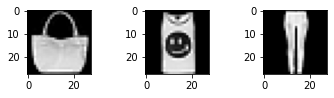

In [17]:
from keras.datasets import fashion_mnist
# get training and testing vectors 
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainy.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testy.shape))

#plotting 
for i in range(3):  
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i+100], cmap=plt.get_cmap('gray'))
plt.show()

## Add Noise

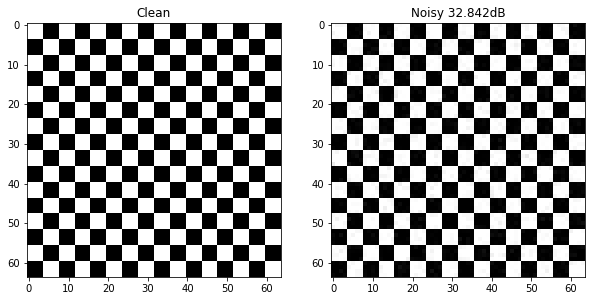

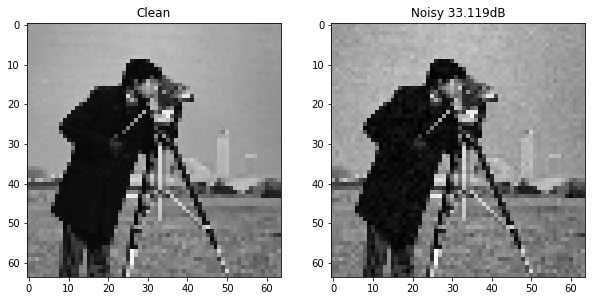

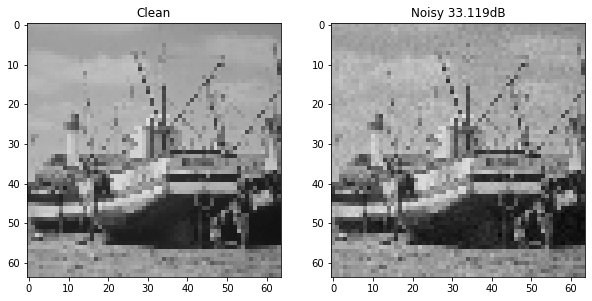

In [40]:
## Import images
images, N = import_images()
noisy_images = images.copy()

for clean in images:

    ## Noise generation    
    sigma = get_sigma_from_SNR(30, images[0])
    noisy = ajout_bruit(clean, sigma=sigma)

    psnr_noisy = psnr(noisy, clean, data_range=255)

    ## Display
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    plot_imbw(clean, ax1, title="Clean"), plot_imbw(noisy, ax2, title="Noisy " +str(round(psnr_noisy,3))+"dB")
    plt.show()

## Denoising

In [34]:
params = {
    "N1_th": 4,
    "N1_wie": 4,
    "Ns": 2,
    "N_step": 4,
    "sigma": 2,
    "lambda_3d": 1,
    "lambda_2d": 1,
    "tau_ht_match": 1,
    "tau_wie_match": 1
}

denoiser = BM3D(np.zeros((16, 16)), **params)
img_denoised = denoiser.denoise()


TypeError: float() argument must be a string or a number, not 'Group3d'

In [44]:
denoised_images = noisy.copy()

for i in range(N):
    clean = images[i]
    noisy = noisy_images[i]
    
    ## Denoising
    denoiser = BM3D(noisy, **params)
    denoised = denoiser.denoise()
    
    psnr_noisy = psnr(noisy, clean, data_range=255)
    psnr_denoised = psnr(denoised, clean, data_range=255)

    ## Display
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))
    plot_imbw(clean, ax1, title="Clean")
    plot_imbw(noisy, ax2, title="Noisy " +str(round(psnr_noisy,3))+"dB")
    plot_imbw(noisy, ax3, title="Denoised " +str(round(psnr_denoised,3))+"dB")
    
    plt.show()

TypeError: float() argument must be a string or a number, not 'Group3d'